In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
pd.set_option('display.max_rows', None)
data_dir = 'data_alpha/'
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

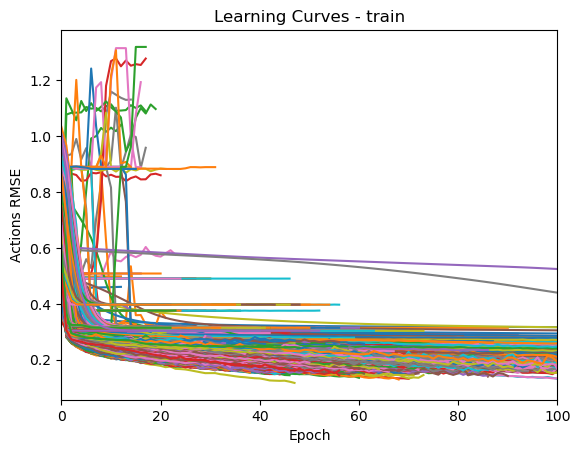

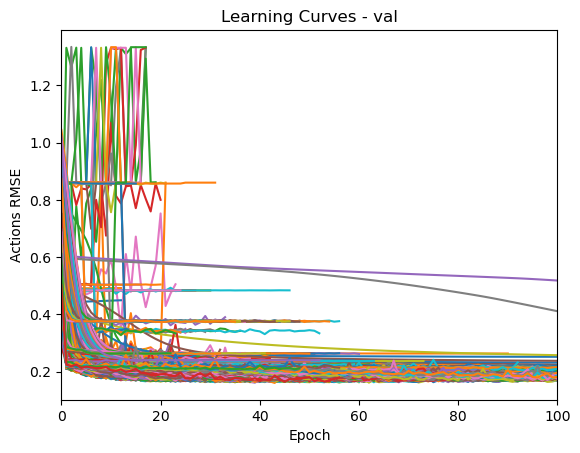

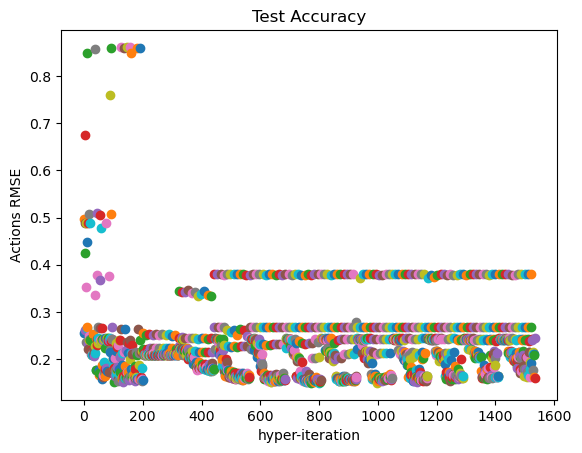

In [3]:
actor_name = 'actor_hyperopt'
actor_file = open(data_dir + actor_name + '.p', 'rb')
actor_table = pickle.load(actor_file)
actor_results = {key:[] for key in list(actor_table[0].keys()) if key not in ['eps', 'learning_rate']}
for point in actor_table:
    for key in point:
        if key in actor_results:
            actor_results[key].append(point[key])
        
for key in actor_results:
    '''
    if key not in ['train', 'val', 'test']:
        plt.plot(actor_results[key])
        plt.title(key)
        plt.xlabel('hyper-iteration')
        plt.ylabel('AU')
        plt.show()
    '''
    if key in ['train', 'val']:
        for learning_curve in actor_results[key]:
            plt.plot(learning_curve)
        plt.title('Learning Curves - ' + key)
        plt.xlabel('Epoch')
        plt.xlim([0, 100])
        plt.ylabel('Actions RMSE')
        plt.show()
    if key in ['test']:
        for i, test in enumerate(actor_results[key]):
            plt.scatter(i, test[-1])
        plt.title('Test Accuracy')
        plt.xlabel('hyper-iteration')
        plt.ylabel('Actions RMSE')
        plt.show()
actor_table_results = actor_results.copy()
del actor_table_results['train']
del actor_table_results['val']
del actor_table_results['test']
actor_table_results['train'] = [curve[-1] for curve in actor_results['train']]
actor_table_results['val'] = [curve[-1] for curve in actor_results['val']]
actor_table_results['test'] = [curve[-1] for curve in actor_results['test']]
actor_pdf = pd.DataFrame(actor_table_results)
actor_pdf.to_csv(data_dir + actor_name + '_pdf.csv')

In [4]:
actor_pdf = actor_pdf.sort_values('test', ascending=True).reset_index(drop=True)
actor_pdf

,nLayers,nNodes,weight_decay,time,train,val,test
0,4.0,10.0,4.0,140.828584,0.165091,0.169459,0.149754
1,6.0,6.0,5.0,67.287173,0.171826,0.170230,0.150087
2,4.0,7.0,10.0,42.741362,0.154220,0.172181,0.150574
3,7.0,7.0,9.0,76.637726,0.157421,0.180591,0.151288
4,4.0,6.0,8.0,34.457266,0.167906,0.169952,0.151868
5,3.0,6.0,6.0,44.560596,0.163724,0.176440,0.151919
6,4.0,10.0,7.0,107.317660,0.155210,0.185119,0.152143
7,4.0,8.0,8.0,31.566191,0.161639,0.179499,0.152287
8,6.0,9.0,5.0,91.548177,0.157193,0.179564,0.152417
9,4.0,6.0,5.0,32.480913,0.174612,0.164745,0.152529


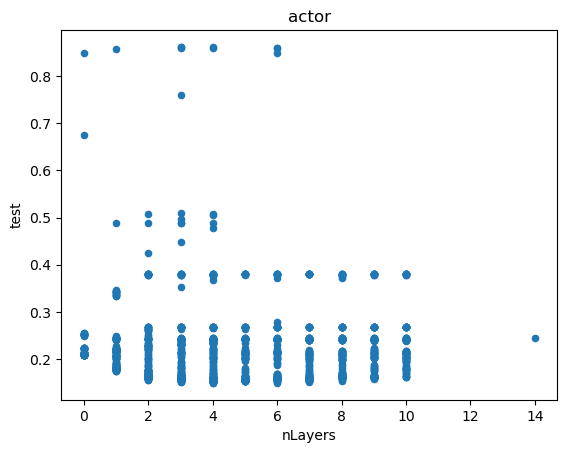

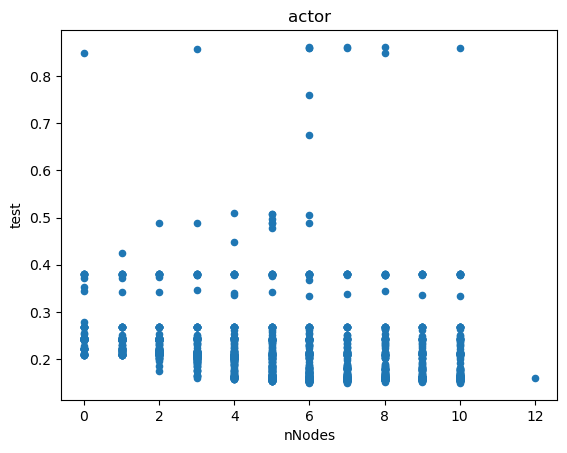

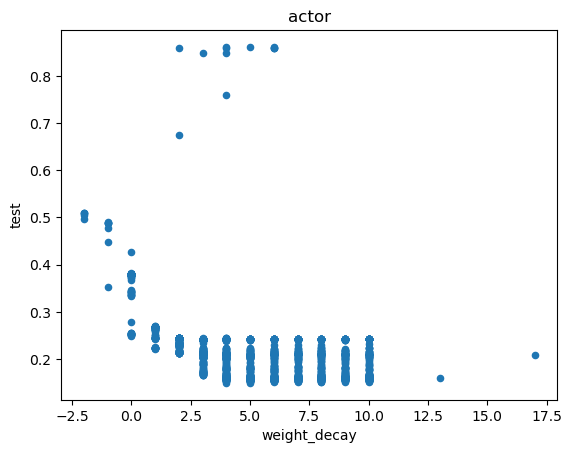

In [4]:
for key in actor_results:
    if key in ['test', 'train', 'val', 'time']:
        continue
    actor_pdf.plot.scatter(key, 'test')
    plt.title('actor')
    plt.show()

In [5]:
actor_cutoff = 0.3
actor_pdf = actor_pdf[actor_pdf['test'] < actor_cutoff].reset_index(drop=True)

In [7]:
counts

array([[15., 16., 11., 11., 12., 11., 12., 11., 11., 11., 11.,  0.,  0.],
       [11., 12., 12., 11., 12., 10., 10., 10., 10., 10., 10.,  0.,  0.],
       [10., 10., 11., 13., 15., 15., 14., 12., 13., 11., 12.,  0.,  0.],
       [10., 10., 11., 12., 14., 26., 17., 12., 12., 14., 11.,  0.,  0.],
       [10., 10., 12., 12., 15., 16., 33., 16., 13., 14., 10.,  0.,  0.],
       [10., 10., 10., 10., 14., 14., 13., 13., 13., 13., 12.,  0.,  1.],
       [11., 10., 10., 10., 10., 12., 15., 12., 11., 12., 12.,  0.,  0.],
       [10., 10., 10., 10., 11., 10., 10., 10., 10., 10., 10.,  0.,  0.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  0.,  0.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  0.,  0.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 

1396


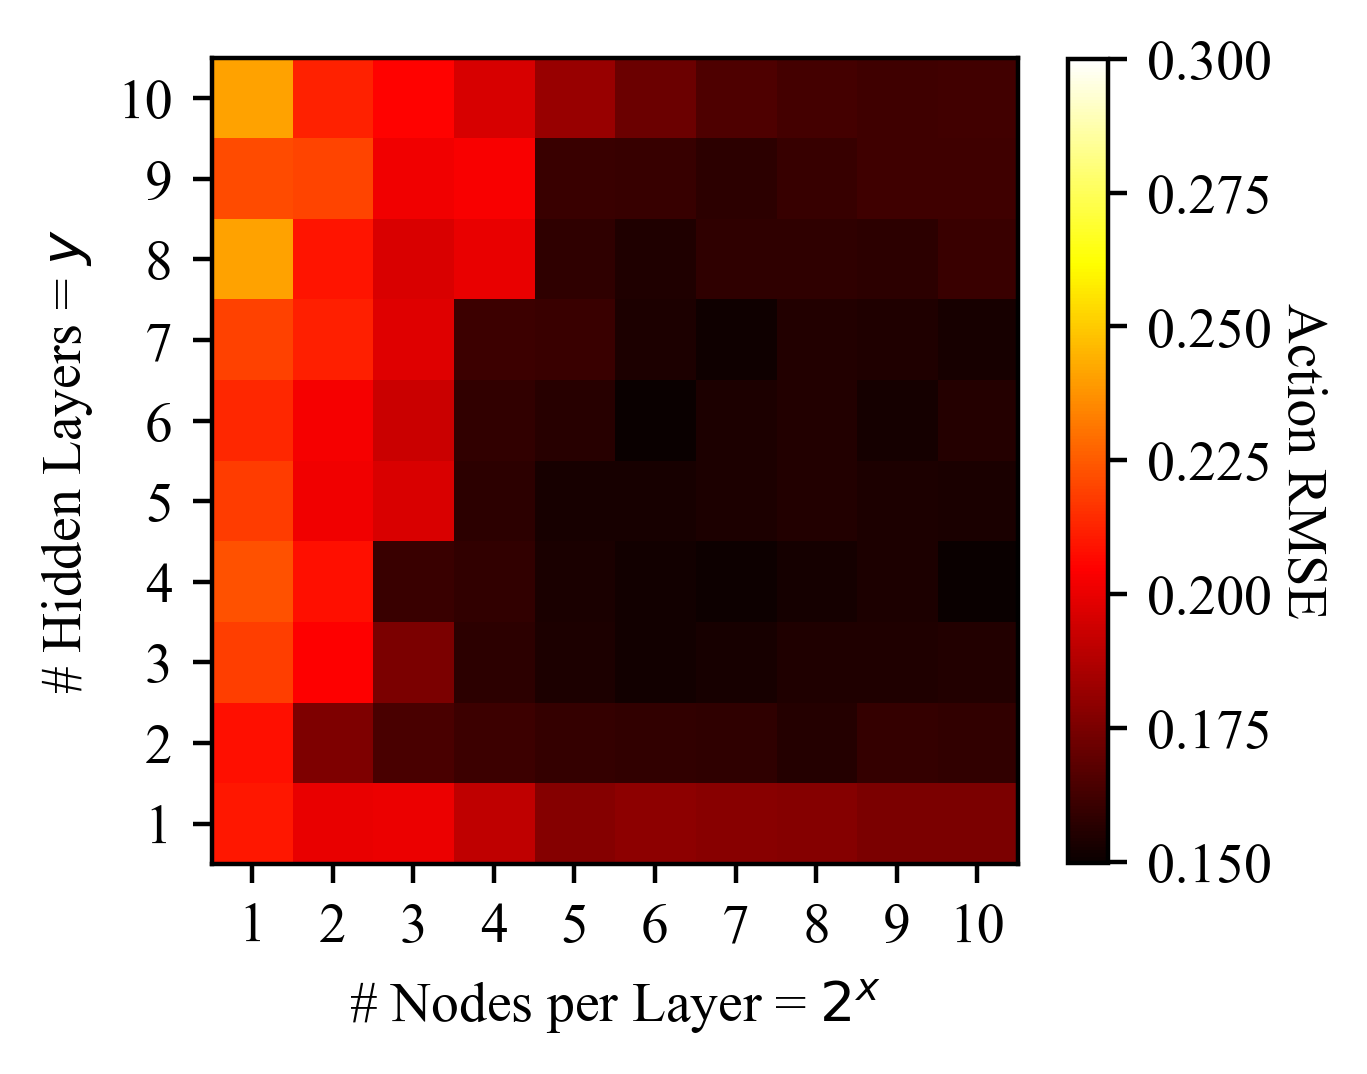

In [6]:
done_pairs = []
min_test = min(actor_pdf['test'])
max_test = max(actor_pdf['test'])
nan_test = actor_cutoff
for key in actor_pdf:
    if key in ['test', 'train', 'val', 'time']:
        continue
    n = len(actor_pdf[key])
    print(n)
    for key2 in actor_pdf:
        if key2 in ['test', 'train', 'val', 'time', key]:
            continue
        if key + key2 in done_pairs or key2 + key in done_pairs:
            continue
        done_pairs.append(key+key2)
        
        # continuous heat map:
        '''
        x = []
        y = []
        z = []
        for i in range(n):
            x.append(actor_pdf[key][i])
            y.append(actor_pdf[key2][i])
            z.append(actor_pdf['test'][i])
        heatmap, xedges, yedges = np.histogram2d(x, y) #, bins=50
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.clf()
        plt.imshow(heatmap.T, extent=extent, origin='lower')
        plt.show()
        '''
        
        # discrete heat map with  missing values:
        min_i = int(min(actor_pdf[key]))
        max_i = int(max(actor_pdf[key]))
        min_j = int(min(actor_pdf[key2]))
        max_j = int(max(actor_pdf[key2]))
        nI = max_i - min_i + 1
        nJ = max_j - min_j + 1
        a = np.full((nI+1, nJ), np.nan, dtype=float)
        a[-1,0] = min_test
        a[-1,1] = max_test
        a[-1,2] = nan_test
        counts = np.zeros((nI, nJ), dtype=float)
        for idx in range(n):
            i = int(actor_pdf[key][idx] - min_i)
            j = int(actor_pdf[key2][idx] - min_j)
            if np.isnan(a[i,j]):
                a[i,j] = actor_pdf['test'][idx]
                counts[i, j] = 1
            else:
                #a[i,j] += actor_pdf['test'][idx]
                a[i,j] = min(a[i,j], actor_pdf['test'][idx])
                counts[i, j] += 1
        for i in range(nI):
            for j in range(nJ):
                if not np.isnan(a[i,j]):
                    #a[i, j] /= counts[i, j]
                    continue
                else:
                    a[i, j] = nan_test
        
        plt.rcParams.update({
            'font.size': 10, 
            'font.family':'serif', 'font.serif':'Times New Roman', 
            #'figure.figsize':(8,8),
            'figure.dpi':400,
        })
        fig = plt.figure()  
        fig.set_size_inches(3.25, 3)
        #fig.savefig('C:/Users/tim/Desktop/figures/hyper.png', bbox_inches = "tight")

        import pickle
        pickle.dump(a, open('hyper.p', 'wb'))
        plt.imshow(a, cmap='hot', interpolation='nearest')
        #plt.title('Hyper Search')
        #plt.colorbar(im, cax=cax)
        cbar = plt.colorbar(shrink=0.87)
        cbar.ax.get_yaxis().labelpad = 10
        cbar.ax.set_ylabel('Action RMSE', rotation=270)
        plt.xlim([0,nJ-1])
        plt.ylim([0,nI-1])
        plt.xticks([j for j in range(0, nJ)], labels=[str(j) for j in range(min_j,max_j+1)])
        plt.yticks([i for i in range(0, nI)], labels=[str(i) for i in range(min_i,max_i+1)])
        plt.xlim([0.5,10.5])
        plt.ylim([0.5,10.5])
        #plt.xticks([j for j in range(1, nJ)], labels=[str(j) for j in range(min_j+1,max_j+1)])
        #plt.yticks([i for i in range(3, nI)], labels=[str(i) for i in range(min_i+3,max_i+1)])
        #plt.xlabel(key2)
        #plt.ylabel(key)
        plt.xlabel(r'# Nodes per Layer = $2^{x}$')
        plt.ylabel(r'# Hidden Layers = $y$')
        #plt.xlabel(r'# Nodes per Layer = $2^{x}$')
        #plt.ylabel(r'# Hidden Layers = $y$')
        fig.savefig('C:/Users/tim/Desktop/figures/hyper.png', bbox_inches = "tight")
        plt.show()
        break
    break

In [ ]:
critic_name = 'critic_hyperopt'
critic_file = open(data_dir + critic_name + '.p', 'rb')
critic_table = pickle.load(critic_file)
critic_results = {key:[] for key in list(critic_table[0].keys()) if key not in ['eps', 'learning_rate']}
for point in critic_table:
    for key in point:
        if key in critic_results:
            critic_results[key].append(point[key])
        
for key in critic_results:
    '''
    if key not in ['train', 'val', 'test']:
        plt.plot(critic_results[key])
        plt.title(key)
        plt.xlabel('hyper-iteration')
        plt.ylabel('AU')
        plt.show()
    '''
    if key in ['train', 'val']:
        min_y = 999
        for learning_curve in critic_results[key]:
            plt.plot(learning_curve)
            min_y = min(min_y, min(learning_curve))
        plt.title('Learning Curves - ' + key)
        plt.xlabel('Epoch')
        plt.xlim([0, 100])
        plt.ylabel('Q-Value RMSE')
        plt.ylim([min_y,200])
        plt.show()
    if key in ['test']:
        for i, test in enumerate(critic_results[key]):
            plt.scatter(i, test[-1])
        plt.title('Test Accuracy')
        plt.xlabel('hyper-iteration')
        plt.ylabel('Q-Value RMSE')
        plt.show()
critic_table_results = critic_results.copy()
del critic_table_results['train']
del critic_table_results['val']
del critic_table_results['test']
critic_table_results['train'] = [curve[-1] for curve in critic_results['train']]
critic_table_results['val'] = [curve[-1] for curve in critic_results['val']]
critic_table_results['test'] = [curve[-1] for curve in critic_results['test']]
critic_pdf = pd.DataFrame(critic_table_results)
critic_pdf.to_csv(data_dir + 'critic_pdf.csv')

In [ ]:
critic_pdf = critic_pdf.sort_values('test').reset_index(drop=True)
critic_pdf

In [ ]:
for key in critic_results:
    if key in ['test', 'train', 'val', 'time']:
        continue
    critic_pdf.plot.scatter(key, 'test')
    plt.title('critic')
    plt.show()

In [ ]:
critic_cutoff = 12
critic_pdf = critic_pdf[critic_pdf['test'] < critic_cutoff].reset_index(drop=True)

In [ ]:
done_pairs = []
min_test = min(critic_pdf['test'])
max_test = max(critic_pdf['test'])
nan_test = critic_cutoff
for key in critic_pdf:
    if key in ['test', 'train', 'val', 'time']:
        continue
    n = len(critic_pdf[key])
    for key2 in critic_pdf:
        if key2 in ['test', 'train', 'val', 'time', key]:
            continue
        if key + key2 in done_pairs or key2 + key in done_pairs:
            continue
        done_pairs.append(key+key2)
        
        # continuous heat map:
        '''
        x = []
        y = []
        z = []
        for i in range(n):
            x.append(critic_pdf[key][i])
            y.append(critic_pdf[key2][i])
            z.append(critic_pdf['test'][i])
        heatmap, xedges, yedges = np.histogram2d(x, y) #, bins=50
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.clf()
        plt.imshow(heatmap.T, extent=extent, origin='lower')
        plt.show()
        '''
        
        # discrete heat map with  missing values:
        min_i = int(min(critic_pdf[key]))
        max_i = int(max(critic_pdf[key]))
        min_j = int(min(critic_pdf[key2]))
        max_j = int(max(critic_pdf[key2]))
        nI = max_i - min_i + 1
        nJ = max_j - min_j + 1
        a = np.full((nI+1, nJ), np.nan, dtype=float)
        a[-1,0] = min_test
        a[-1,1] = max_test
        a[-1,2] = nan_test
        counts = np.zeros((nI, nJ), dtype=float)
        for idx in range(n):
            i = int(critic_pdf[key][idx] - min_i)
            j = int(critic_pdf[key2][idx] - min_j)
            if np.isnan(a[i,j]):
                a[i,j] = critic_pdf['test'][idx]
                counts[i, j] = 1
            else:
                #a[i,j] += actor_pdf['test'][idx]
                a[i,j] = min(a[i,j], critic_pdf['test'][idx])
                counts[i, j] += 1
        for i in range(nI):
            for j in range(nJ):
                if not np.isnan(a[i,j]):
                    #a[i, j] /= counts[i, j]
                    continue
                else:
                    a[i, j] = nan_test
        plt.imshow(a, cmap='hot', interpolation='nearest')
        plt.title('critic')
        plt.colorbar()
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.xticks([j for j in range(nJ)], labels=[str(j) for j in range(min_j,max_j+1)])
        plt.yticks([i for i in range(nI)], labels=[str(i) for i in range(min_i,max_i+1)])
        plt.xlabel(key2)
        plt.ylabel(key)
        plt.show()

In [ ]:
actor_runs = pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
by_weight_decay = {}
best_test = 999
for i, run in enumerate(actor_runs):
    run_num = int(i % 100)
    weight_decay = int(run['weight_decay'])
    if weight_decay not in by_weight_decay:
        by_weight_decay[weight_decay] = []
    r = run['test'][-1]
    by_weight_decay[weight_decay].append(r)
    if r < best_test:
        best_test = r
        best_wd = weight_decay
        best_run = run_num
print(best_test, best_wd, best_run)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for wd in by_weight_decay:
    for r in by_weight_decay[wd]:
        plt.scatter(wd, r, color = colors[wd])
plt.show()

In [ ]:
import torch
best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + 'decay_' + str(best_wd) + '.pt')
torch.save(best_actor, 'actor_pretrained_weights_vert.pt')
#best_actor

In [ ]:
critic_runs = pickle.load(open(data_dir + 'models/critic_runs.p', 'rb'))
by_weight_decay = {}
best_test = 999
for i, run in enumerate(critic_runs):
    run_num = int(i % 100)
    weight_decay = int(run['weight_decay'])
    if weight_decay not in by_weight_decay:
        by_weight_decay[weight_decay] = []
    r = run['test'][-1]
    by_weight_decay[weight_decay].append(r)
    if r < best_test:
        best_test = r
        best_wd = weight_decay
        best_run = run_num
print(best_test, best_wd, best_run)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for wd in by_weight_decay:
    for r in by_weight_decay[wd]:
        plt.scatter(wd, r, color = colors[wd])
plt.show()

In [ ]:
import torch
best_critc = torch.load(data_dir + 'models/critic_run_' + str(best_run) + 'decay_' + str(best_wd) + '.pt')
torch.save(best_critc, 'critic_pretrained_weights_vert.pt')
#best_critc

In [ ]:
data_dir = 'SECON2_Navi_Horz/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

In [ ]:
data_dir = 'SECON3_Navi_Vert/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

In [ ]:
data_dir = 'SECON3_Res_Horz/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

In [ ]:
data_dir = 'SECON3_Res_Vert/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

In [ ]:
data_dir = 'SECON3_Fuse_Horz/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

In [ ]:
data_dir = 'SECON3_Fuse_Vert/'

actor_runs =  pickle.load(open(data_dir + 'models/actor_runs.p', 'rb'))
mses = []
best_mse = 999
for i, run in enumerate(actor_runs):
    mse = run['test'][-1]
    mses.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_run = i
print(best_mse, i)

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00', 'black']
for mse in mses:
    plt.scatter(1, mse, color='green')
plt.show()

best_actor = torch.load(data_dir + 'models/actor_run_' + str(best_run) + '.pt')
torch.save(best_actor, data_dir + 'models/best_actor.pt')

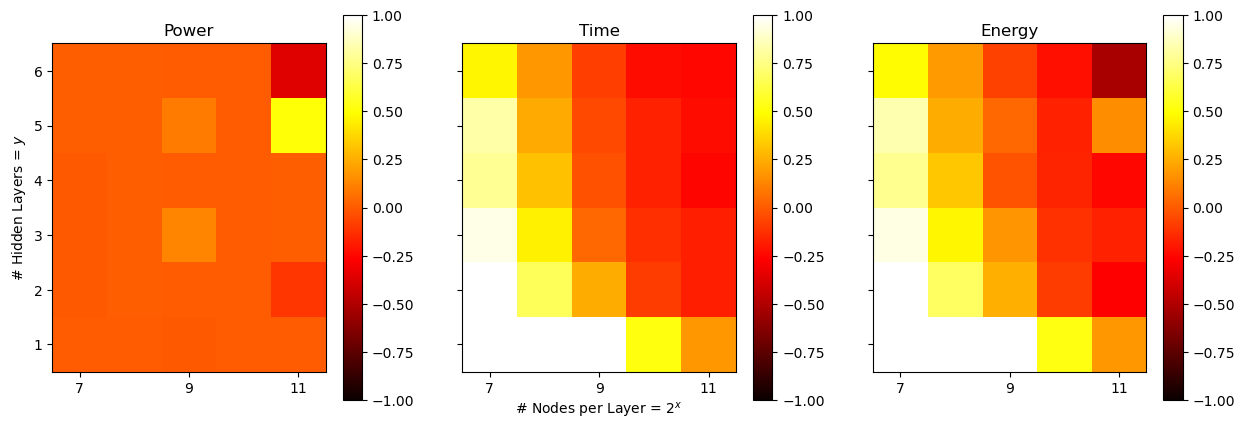

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
p = np.zeros((7,12), dtype=float)
t = np.zeros((7,12), dtype=float)
e = np.zeros((7,12), dtype=float)
for i_nodes in range(7, 12):
    for n_layers in range(1, 7):
        if not os.path.exists('layers2/navi_runs_' + str(n_layers) + '_' + str(i_nodes) + '.p'):
            continue
        if not os.path.exists('layers2/navislim_runs_' + str(n_layers) + '_' + str(i_nodes) + '.p'):
            continue
        pwr1, time1, temp1 = pickle.load(open('layers2/navi_runs_' + str(n_layers) + '_' + str(i_nodes) + '.p', 'rb'))
        pwr2, time2, temp2 = pickle.load(open('layers2/navislim_runs_' + str(n_layers) + '_' + str(i_nodes) + '.p', 'rb'))
        p[n_layers, i_nodes] = (np.mean(pwr2) - np.mean(pwr1)) / np.mean(pwr1)
        t[n_layers, i_nodes] = (np.mean(time2) - np.mean(time1)) / np.mean(time1)
        e[n_layers, i_nodes] = (np.mean(np.multiply(pwr2, time2)) - 
                                np.mean(np.multiply(pwr1, time1))) / np.mean(np.multiply(pwr1, time1))
        
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))

obj = axs[0].imshow(p, cmap='hot', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(obj, ax=axs[0])

obj = axs[1].imshow(t, cmap='hot', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(obj, ax=axs[1])

obj = axs[2].imshow(e, cmap='hot', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(obj, ax=axs[2])


axs[0].set_xlim([6.5,11.5])
axs[0].set_ylim([0.5,6.5])
axs[0].set_title('Power')
axs[1].set_xlim([6.5,11.5])
axs[1].set_ylim([0.5,6.5])
axs[1].set_title('Time')
axs[2].set_xlim([6.5,11.5])
axs[2].set_xticks([7, 9, 11])
axs[2].set_ylim([0.5,6.5])
axs[2].set_title('Energy')

axs[1].set_xlabel(r'# Nodes per Layer = $2^{x}$')
axs[0].set_ylabel(r'# Hidden Layers = $y$')

#plt.tight_layout()
plt.show()

In [4]:
np.std(p)

0.07095440215242207

In [6]:
pickle.dump(e, open('energy.p', 'wb'))

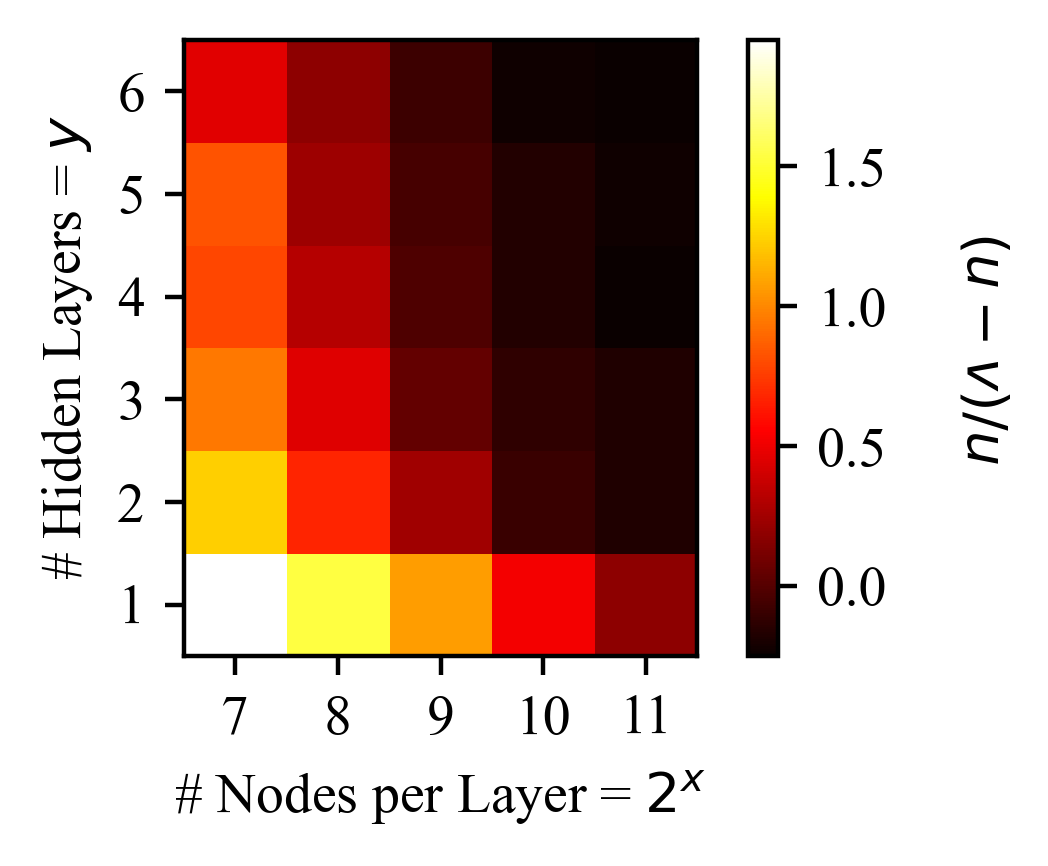

In [2]:
pickle.dump(t, open('nano.p', 'wb'))

plt.rcParams.update({
    'font.size': 10, 
    'font.family':'serif', 'font.serif':'Times New Roman', 
    #'figure.figsize':(8,8),
    'figure.dpi':400,
})
fig = plt.figure()  
fig.set_size_inches(3.25, 2)
        
plt.imshow(t, cmap='hot', interpolation='nearest')
cbar= plt.colorbar()
cbar.ax.get_yaxis().labelpad = 22
cbar.ax.set_ylabel(r'$(u-v)/u$', rotation=270)
plt.xlabel(r'# Nodes per Layer = $2^{x}$')
plt.ylabel(r'# Hidden Layers = $y$')
plt.xlim([6.5, 11.5])
plt.ylim([0.5, 6.5])
plt.xticks([7,8,9,10,11])
plt.yticks([1,2,3,4,5,6])
plt.show()

#fig.savefig('C:/Users/tim/Desktop/figures/nano.png', bbox_inches = "tight")